# EXPLORING NOISE COMPLAINTS DATA

The noise dataset contains records of noise complaints reported in Westminster. The complaints are reported in the 
service request column. Each complaint received has a geometry coordinates calculated for that location. This will 
enable spatial plotting of complaints received in Westminster. 

# SECTION A

In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from __future__ import division
#setting style of plotting
sns.set(style="whitegrid", color_codes=True)

In [3]:
#reading noise data
noise = pd.read_csv('NoiseComplaints.csv')
df_licenses = pd.read_csv('LiveLicences.csv')

In [4]:
#printing columns in dataframe
noise.columns

Index([u'UPRN', u'TradingName', u'Address', u'ServiceRequestGroupSubType',
       u'ServiceRequest', u'Street', u'Ward', u'StressArea', u'Lat', u'Long',
       u'ReceivedDate', u'ReceivedDayOfWeek', u'ReceivedDayOfWeekNumber',
       u'ReceivedMonth', u'ReceivedYear', u'ReceivedMonthNumber',
       u'ReceivedTime', u'ReceivedTimeHourBand', u'ContactMethod'],
      dtype='object')

In [6]:
#checking contents of dataframe
noise.head(1)

,UPRN,TradingName,Address,ServiceRequestGroupSubType,ServiceRequest,Street,Ward,StressArea,Lat,Long,ReceivedDate,ReceivedDayOfWeek,ReceivedDayOfWeekNumber,ReceivedMonth,ReceivedYear,ReceivedMonthNumber,ReceivedTime,ReceivedTimeHourBand,ContactMethod
0,010033549813,NaN,Irving Street London,Street,Noise in the street,Irving Street,St James`s,West End,51.509917,-0.128873,2015-01-01,Thu,4,Jan,2015,1,09:58,09:00 - 10:00,Telephone


It must be noted that not much data was collected in 2017, so it is important to understand the period up to which the
the data was collected in 2017. The output below shows data was collected from January to March in 2017

In [7]:
#printing dataframe where year is 2017
noise2017 = noise[noise.ReceivedYear==2017]

In [8]:
#checking for the unique months in 2017
month2017 = noise2017.ReceivedMonth.unique()

In [9]:
#printing results
month2017

array(['Jan', 'Feb', 'Mar'], dtype=object)

In [10]:
#filtering the timehourband for evening economy
evening_complaints  = noise[(noise.ReceivedTime>='18:00') & (noise.ReceivedTime<='20:00')]

Could not extract time between 20:00 and 04:00, representing night-time complaints so I filtered it in segments. That
the hours between 20:00 and midnight (0:00) representing first segment, and then the hours between midnight and 04:00
representing the second segment. I then concatenated the two segments to form the night-time complaints received.

In [11]:
#filtering complaints made at night. That is between 20:00 and 04:00
n1 = noise[(noise.ReceivedTime>='20:00') & (noise.ReceivedTime<='23:59')]
n2 = noise[(noise.ReceivedTime>='00:00') & (noise.ReceivedTime<='04:00')]

In [12]:
#joining the two segments of received time to represent night-time complaints
night_complaints = pd.concat([n1,n2])

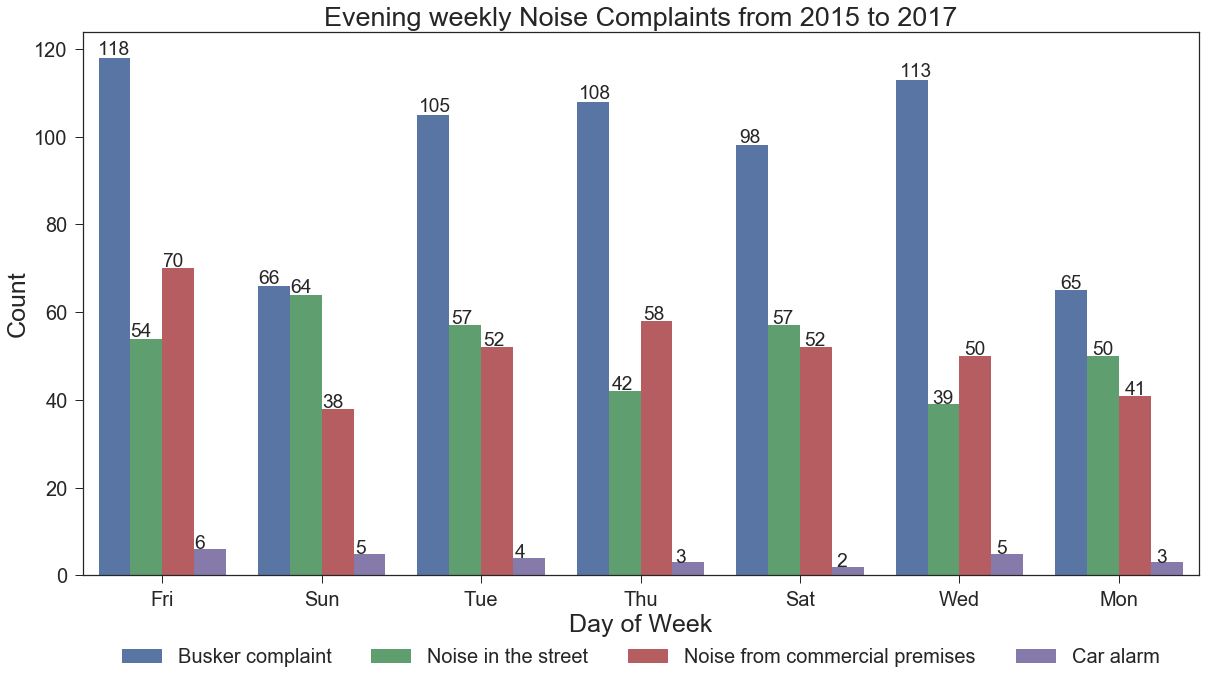

In [13]:
#plotting the number of complaints received for each day in the evening throughout the three year period
sns.set(font_scale=1.6)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='ReceivedDayOfWeek',hue='ServiceRequest',data=evening_complaints)
plt.title('Evening weekly Noise Complaints from 2015 to 2017',fontsize=27)
plt.xlabel('Day of Week', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1),ncol=4,fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
for ann in ax.patches:
    ax.annotate("%.f" % ann.get_height(), (ann.get_x() * 1.006, ann.get_height() * 1.006))
#saving figure    
plt.savefig('/Users/jamessolomon/Desktop/plots/evening_weekly_noise.png',bbox_inches="tight")

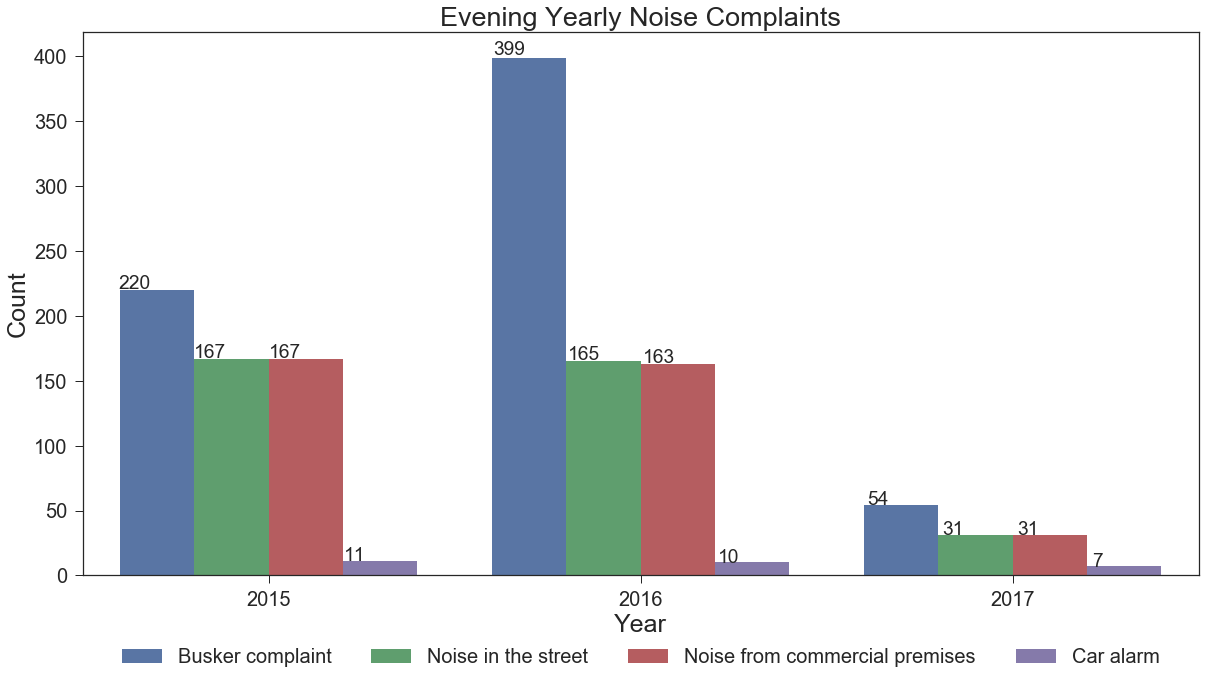

In [14]:
#plotting the number of complaints received for each year in the evening 
sns.set(font_scale=1.6)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='ReceivedYear',hue='ServiceRequest',data=evening_complaints)
plt.title('Evening Yearly Noise Complaints',fontsize=27)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1),ncol=4,fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
for ann in ax.patches:
    ax.annotate("%.f" % ann.get_height(), (ann.get_x() * 1.006, ann.get_height() * 1.006))
#saving figure    
plt.savefig('/Users/jamessolomon/Desktop/plots/evening_yearly_noise.png',bbox_inches="tight")

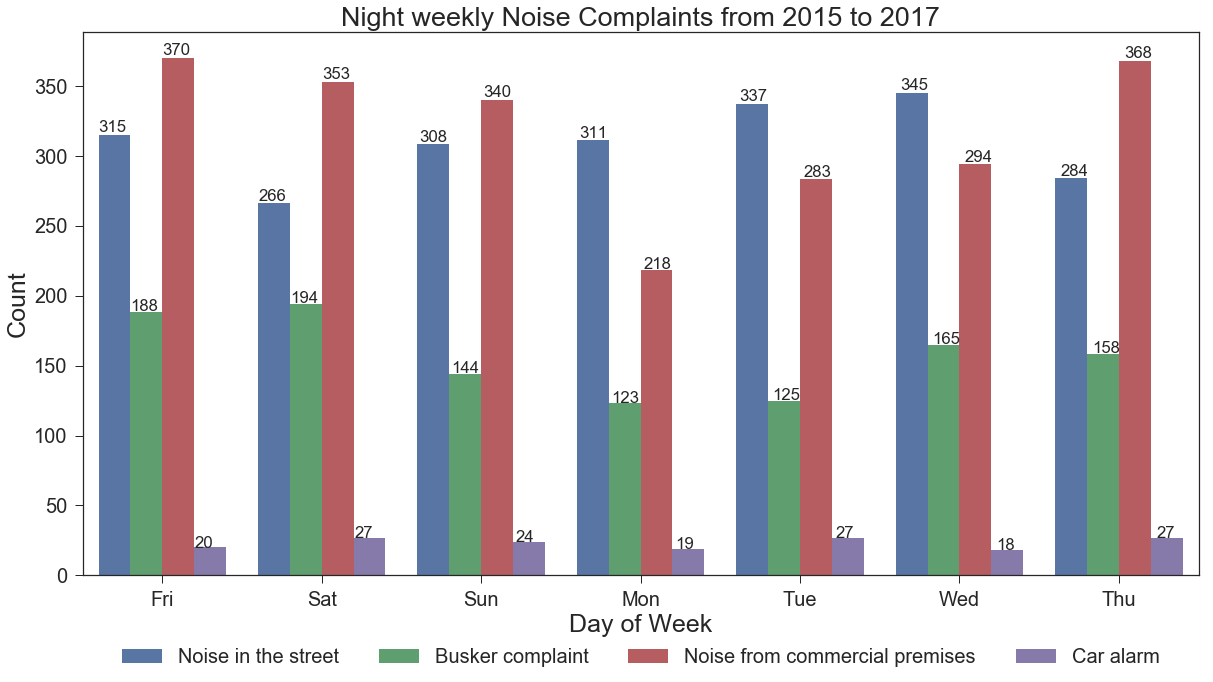

In [57]:
#plotting the number of complaints received for each day in the night throughout the three year period
sns.set(font_scale=1.4)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='ReceivedDayOfWeek',hue='ServiceRequest',data=night_complaints)
plt.title('Night weekly Noise Complaints from 2015 to 2017',fontsize=27)
plt.xlabel('Day of Week', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1),ncol=4,fontsize=20)
for ann in ax.patches:
    ax.annotate("%.f" % ann.get_height(), (ann.get_x() * 1.006, ann.get_height() * 1.006))
#saving figure    
plt.savefig('/Users/jamessolomon/Desktop/plots/night_weekly_noise.png',bbox_inches="tight")

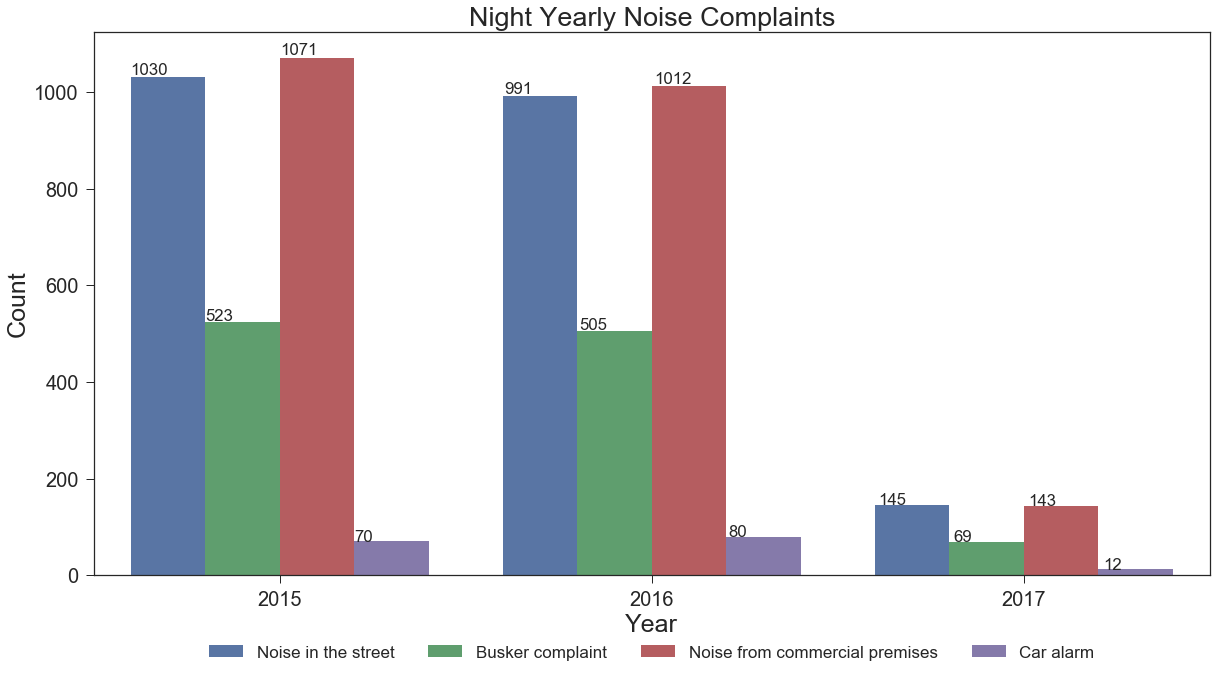

In [16]:
#plotting the number of complaints received for each day in the night throughout the three year period
sns.set(font_scale=1.4)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='ReceivedYear',hue='ServiceRequest',data=night_complaints)
plt.title('Night Yearly Noise Complaints',fontsize=27)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1),ncol=4,fontsize=17)
for ann in ax.patches:
    ax.annotate("%.f" % ann.get_height(), (ann.get_x() * 1.006, ann.get_height() * 1.006))
#saving figure    
plt.savefig('/Users/jamessolomon/Desktop/plots/night_yearly_noise.png',bbox_inches="tight")

# SECTION B

This section shows a spatial plot of noise complaints in Westminster received in the evening and night-time.

In [17]:
#calling dataframe from another notebook titled LICENCE
%store -r complete_wards

In [18]:
#making copies of dataframes to save original copy from being modified
eve = evening_complaints.copy()
ngt = night_complaints.copy()

In [19]:
#creating geometry points of dataframe
eve['geometry'] = [Point(xy) for xy in zip(eve.Long, eve.Lat)]

In [20]:
#creating a geodataframe and setting to the right coordinate reference system (crs)
eve_geo = gpd.GeoDataFrame(eve, crs={'init' :'epsg:4326'})

In [21]:
#setting both dataframes to same crs
eve_geo = eve_geo.to_crs(complete_wards.crs)

In [22]:
#creating a spatial join of shape file and geodataframe
eve_join = gpd.sjoin(eve_geo, complete_wards, how="inner", op='intersects')

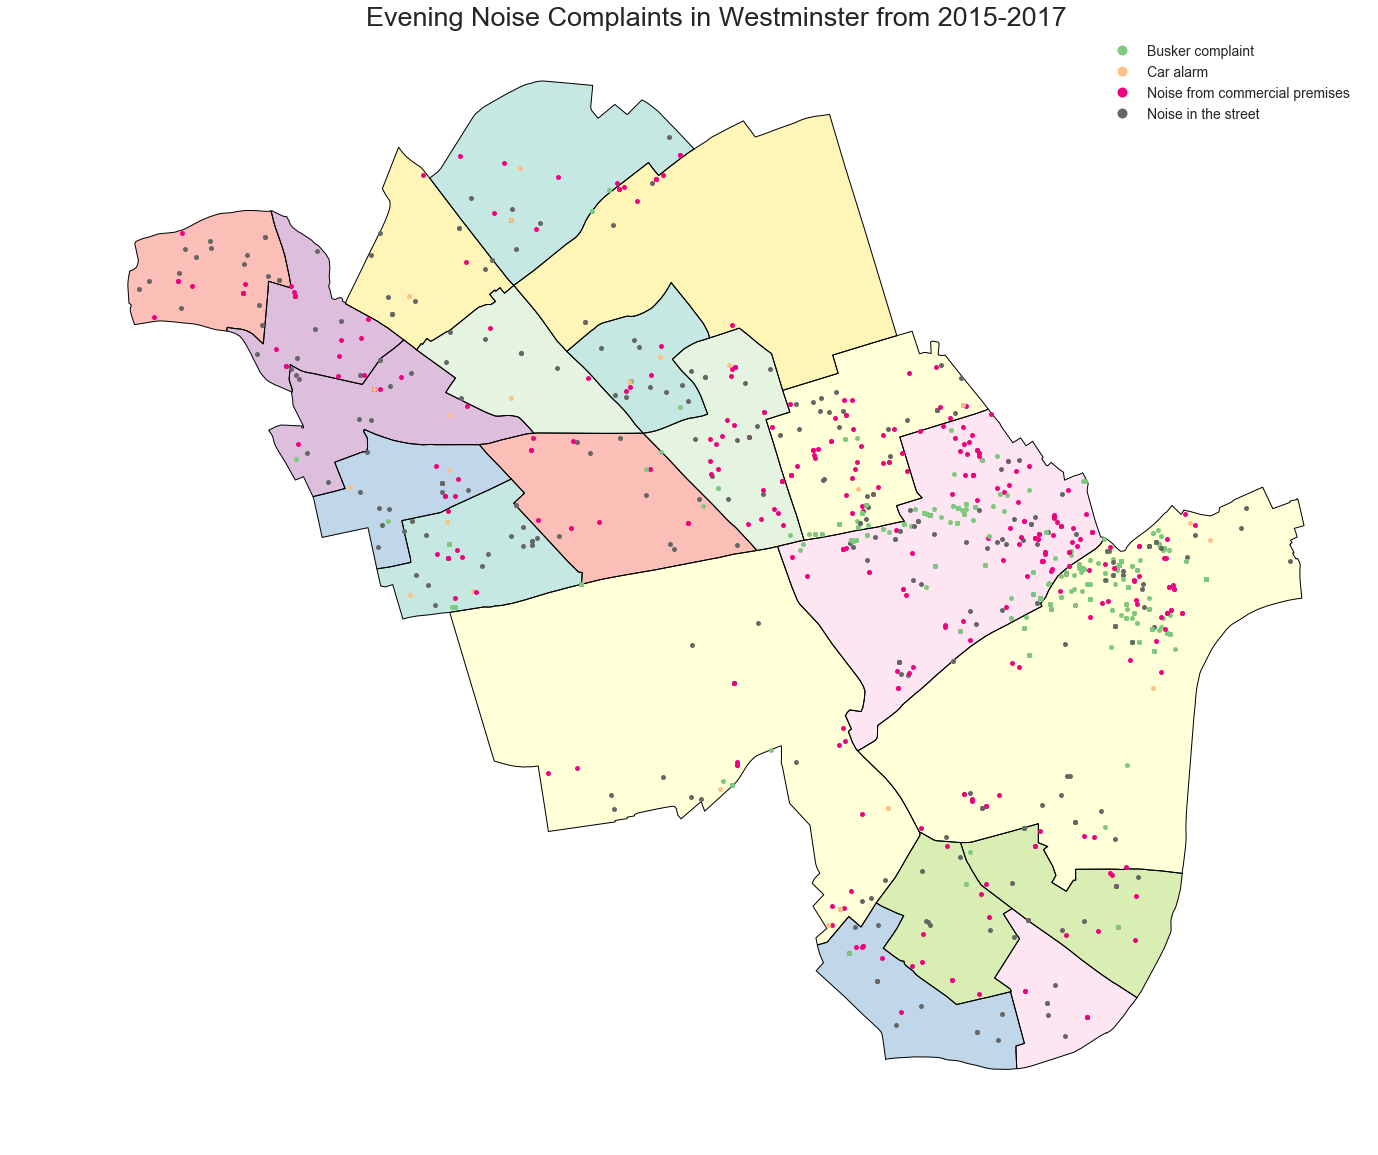

In [23]:
#plotting premises activity type in Westminster
base = complete_wards.plot(figsize=(30,20),cmap='Set3')
eve_join.plot(ax=base, marker='o', cmap='Accent', markersize=5, column='ServiceRequest',legend=True,alpha=1)
plt.title('Evening Noise Complaints in Westminster from 2015-2017', fontsize=27)
a_ = plt.axis('off')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/evening_noise.png',bbox_inches="tight")

In [24]:
#creating geometry points of dataframe
ngt['geometry'] = [Point(xy) for xy in zip(ngt.Long, ngt.Lat)]

In [25]:
#creating a geodataframe and setting to the right coordinate reference system (crs)
ngt_geo = gpd.GeoDataFrame(ngt, crs={'init' :'epsg:4326'})

In [26]:
#setting both dataframes to same crs
ngt_geo = ngt_geo.to_crs(complete_wards.crs)

In [27]:
#creating a spatial join of shape file and geodataframe
ngt_join = gpd.sjoin(ngt_geo, complete_wards, how="inner", op='intersects')

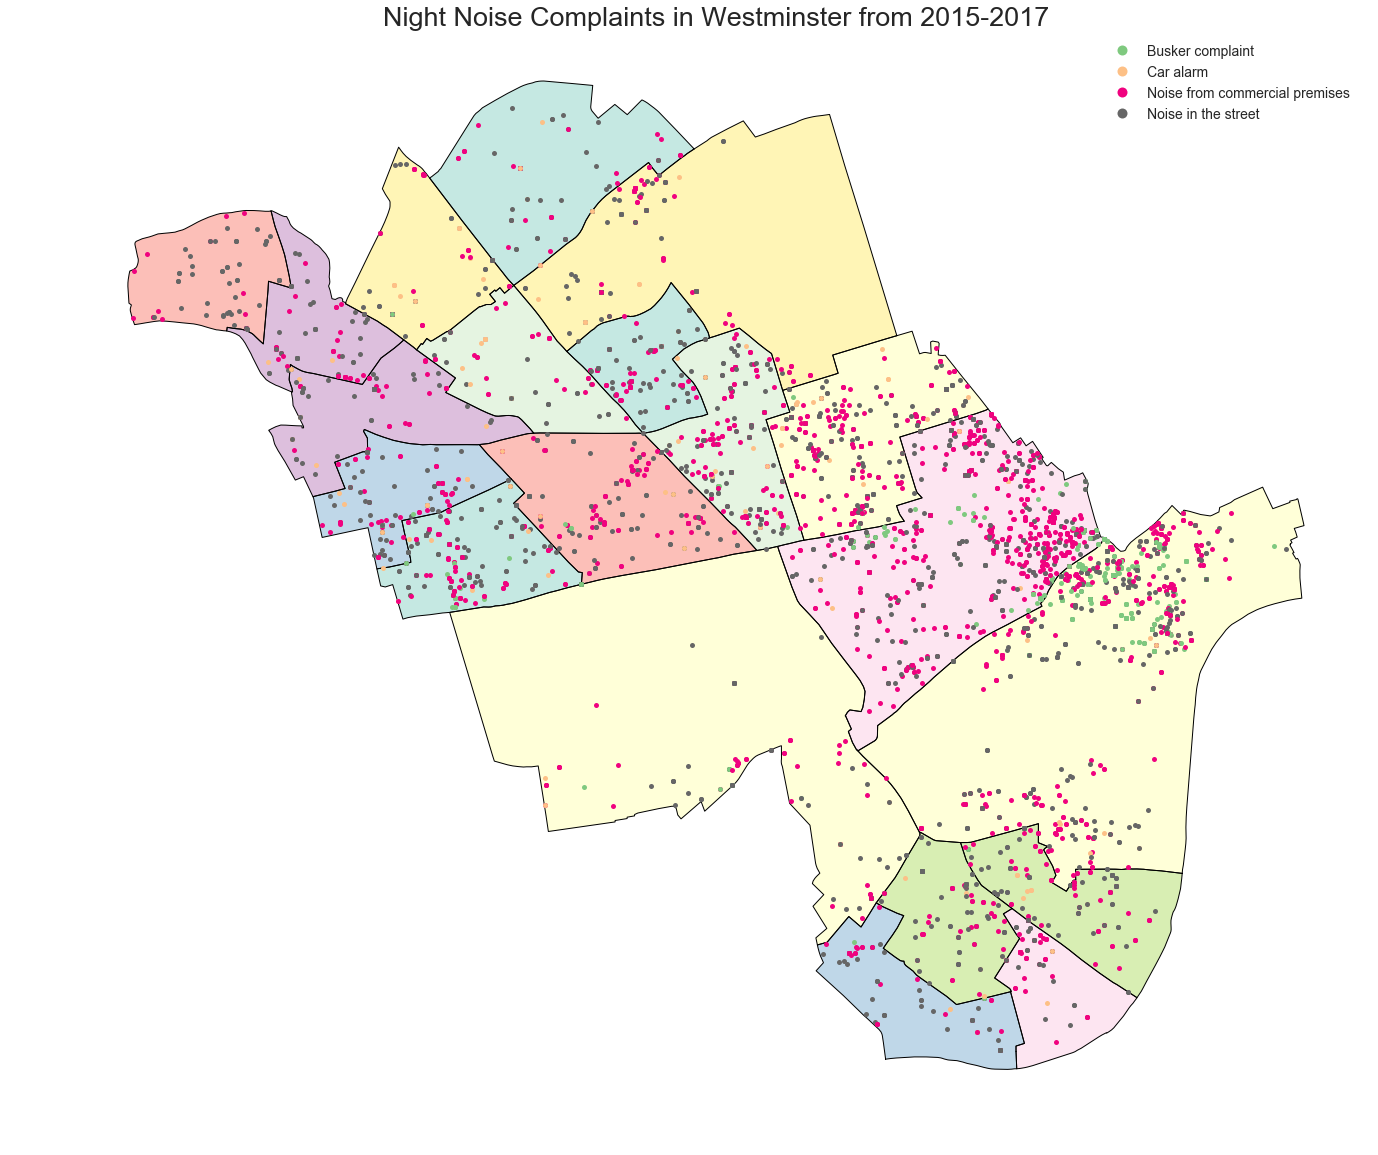

In [28]:
#plotting premises activity type in Westminster
base = complete_wards.plot(figsize=(30,20),cmap='Set3')
ngt_join.plot(ax=base, marker='o', cmap='Accent', markersize=5, column='ServiceRequest',legend=True,alpha=1)
plt.title('Night Noise Complaints in Westminster from 2015-2017', fontsize=27)
a_ = plt.axis('off')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/night_noise.png',bbox_inches="tight")

# SECTION C

This section outputs the total number of complaints received per ward. I also created a dataframe for aggregated count
of noise complaints received for evening and night-time to run a statistical analysis in R. 

In [29]:
#resetting index
evening_complaints = evening_complaints.reset_index(drop=True)

In [30]:
#resetting index
night_complaints = night_complaints.reset_index(drop=True)

In [31]:
#counting number of complaints received
evening_group = pd.DataFrame(evening_complaints.groupby(['Ward','ReceivedYear',
                                            'ServiceRequest'])['ServiceRequest'].count())

In [32]:
#renaming column
evening_group2 = evening_group.rename(columns={'ServiceRequest':'Total'})

In [33]:
#resetting index
evening_group3 = evening_group2.reset_index()

In [34]:
#aggregating the number of complaints received
evening_group3 = pd.DataFrame(evening_group3.groupby(['Ward'])['Total'].sum())

In [46]:
#printing results
evening_group3

,Total
Ward,
Abbey Road,20
Bayswater,24
Bryanston and Dorset Square,41
Church Street,18
Churchill,21
Harrow Road,22
Hyde Park,24
Knightsbridge and Belgravia,60
Lancaster Gate,48


In [47]:
#stress area
#counting number of complaints received
stress_evening_group = pd.DataFrame(evening_complaints.groupby(['StressArea','ServiceRequest'])['ServiceRequest'].count())

In [48]:
#renaming column
stress_evening_group2 = stress_evening_group.rename(columns={'ServiceRequest':'Total'})

In [49]:
#resetting index
stress_evening_group3 = stress_evening_group2.reset_index()

In [50]:
#aggregating the number of complaints received
stress_evening_group3 = pd.DataFrame(stress_evening_group3.groupby(['StressArea'])['Total'].sum())

In [51]:
#printing results
stress_evening_group3

,Total
StressArea,
Edgware Road,3
Not Recorded,1000
Queensway and Bayswater,42
West End,380


Below is the step taken to create dataframe with sum count of noise complaints to use in statistical analysis in R

In [58]:
#counting evening complaints for each ward and creating new dataframe
noise1 = pd.DataFrame(evening_complaints.groupby('Ward')['ServiceRequest'].count())

In [59]:
#renaming column
noise1 = noise1.rename(columns={'ServiceRequest':'Evening_noise'})

In [60]:
#counting night complaints for each ward and creating new dataframe
noise2 = pd.DataFrame(night_complaints.groupby('Ward')['ServiceRequest'].count())

In [61]:
#renaming column
noise2 = noise2.rename(columns={'ServiceRequest':'Night_noise'})

In [62]:
#joining the two dataframes
noise_merge = pd.concat([noise1,noise2],axis=1)

In [64]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store noise_merge

Stored 'noise_merge' (DataFrame)
